In [1]:
from keras.models import load_model
import numpy as np
from keras import backend as K
from PIL import Image
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
img_file='T2.jpg'
image = Image.open(img_file)
image = image.resize((120,80))
image = np.array(image)
image = image[:,:]
image = np.array(image,dtype=np.float64)
image = np.expand_dims(image,axis=0)

In [3]:
vgg='VGG_model.h5'
model=load_model(vgg)
score = model.predict(image)

In [4]:
score

array([[0.02142061, 0.97857946]], dtype=float32)

In [5]:
from matplotlib.pyplot import figure, imshow, axis
import matplotlib.pyplot as plt
import math

def visualise_layer(layer_id , cols=10):
    fig = plt.figure(figsize=(20, 20))
    
    layer_output = K.function([model.layers[0].input],[model.layers[layer_id].output])
    output = layer_output([image])[0]
    
    number_of_images = output.shape[3]
    
    rows = math.ceil(number_of_images / cols)
    
    for i in range(number_of_images):
        a = output[0,:,:,i]
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(a)
        
    plt.show()
    

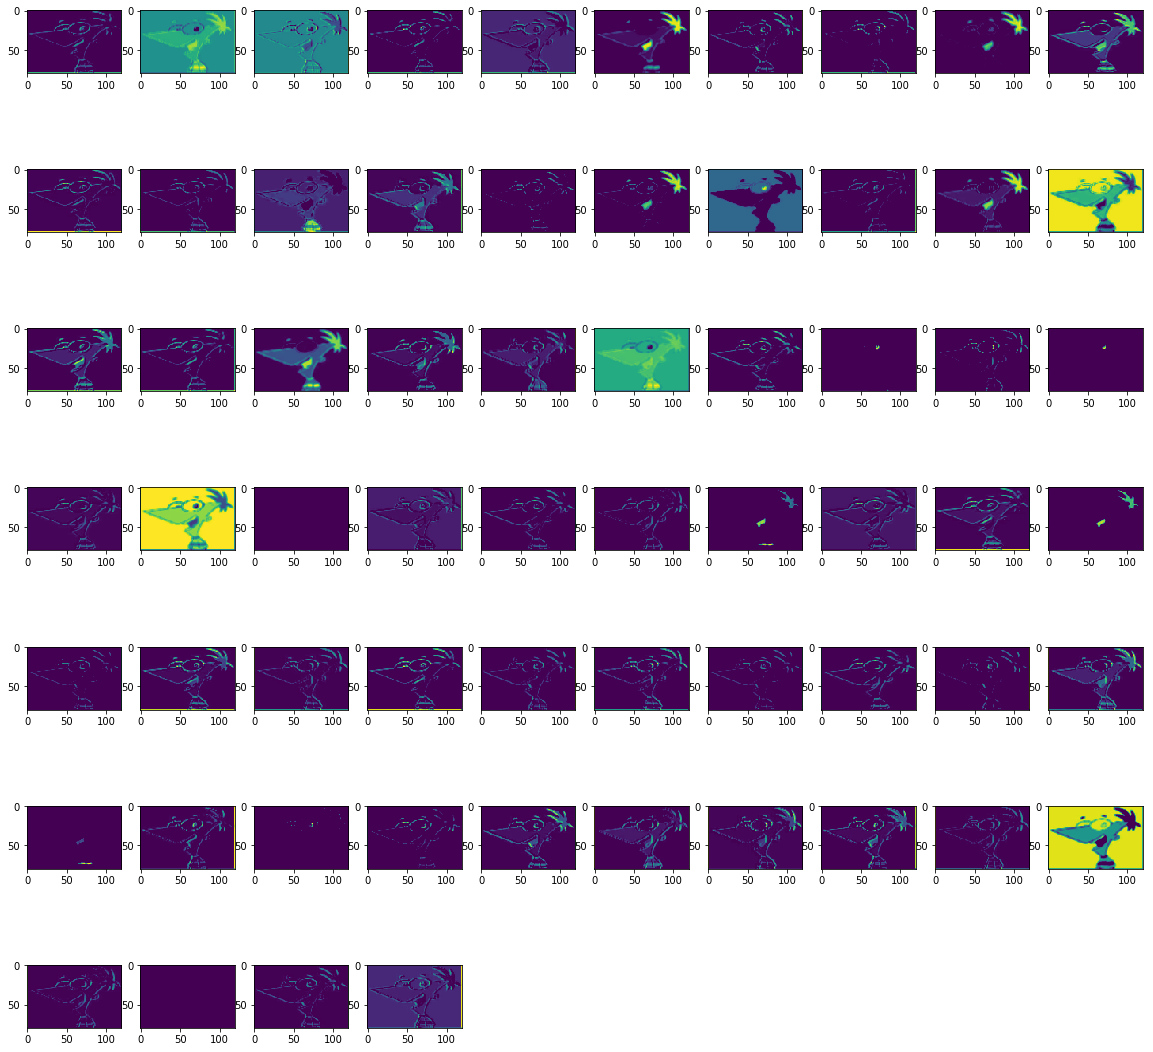

In [6]:
visualise_layer(1)

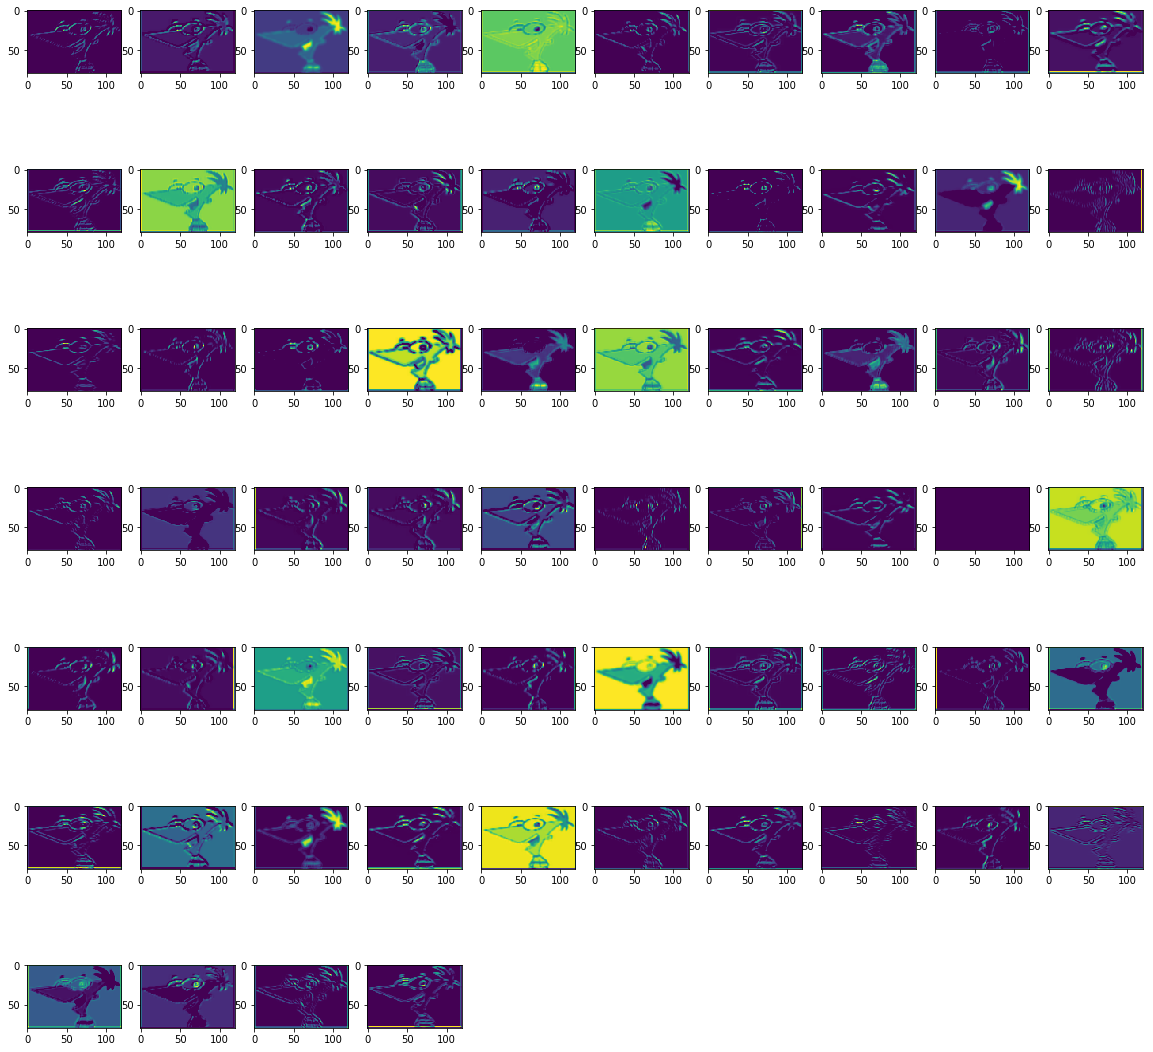

In [7]:
visualise_layer(2)

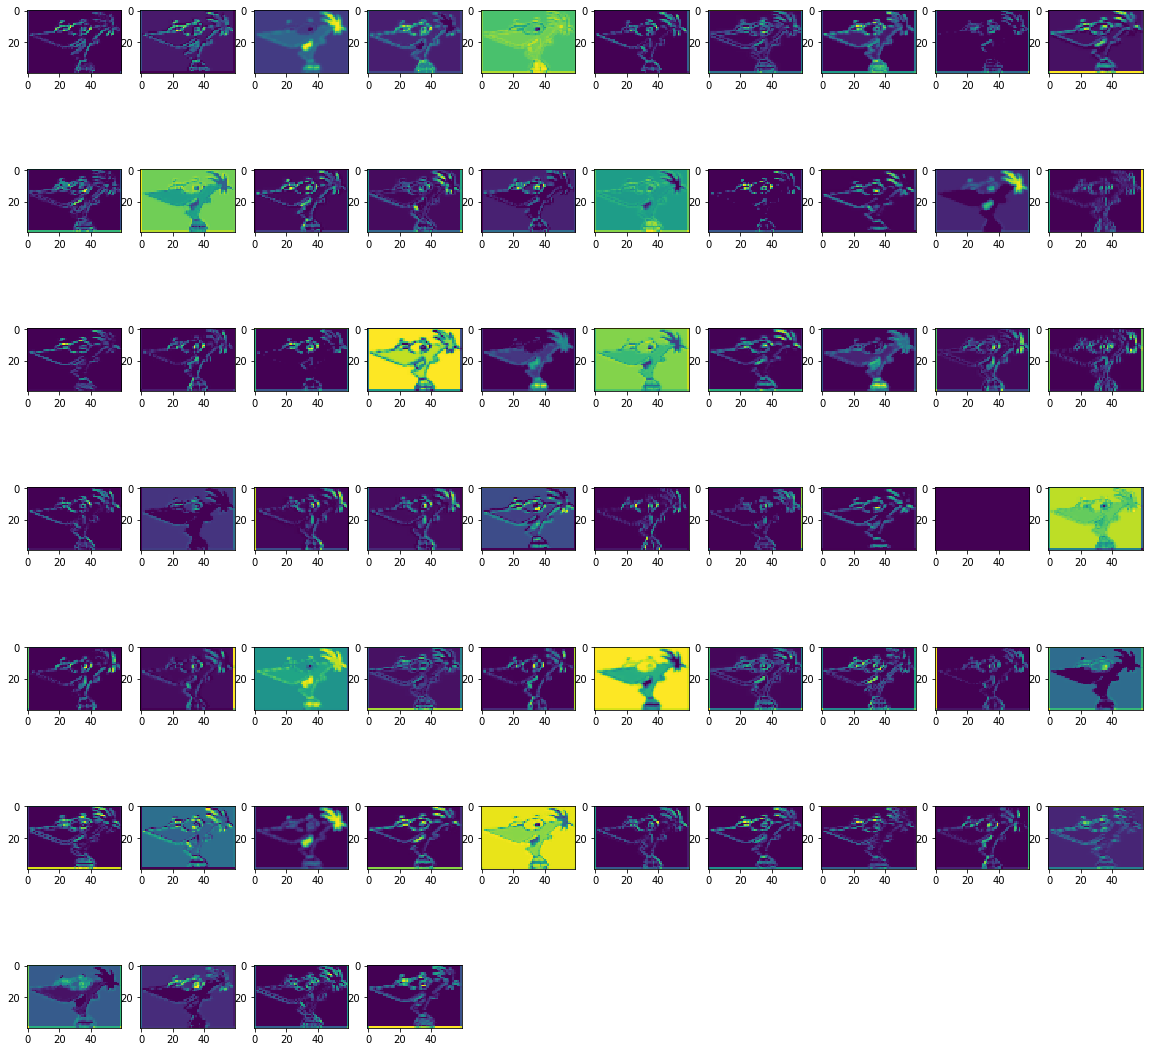

In [8]:
visualise_layer(3)

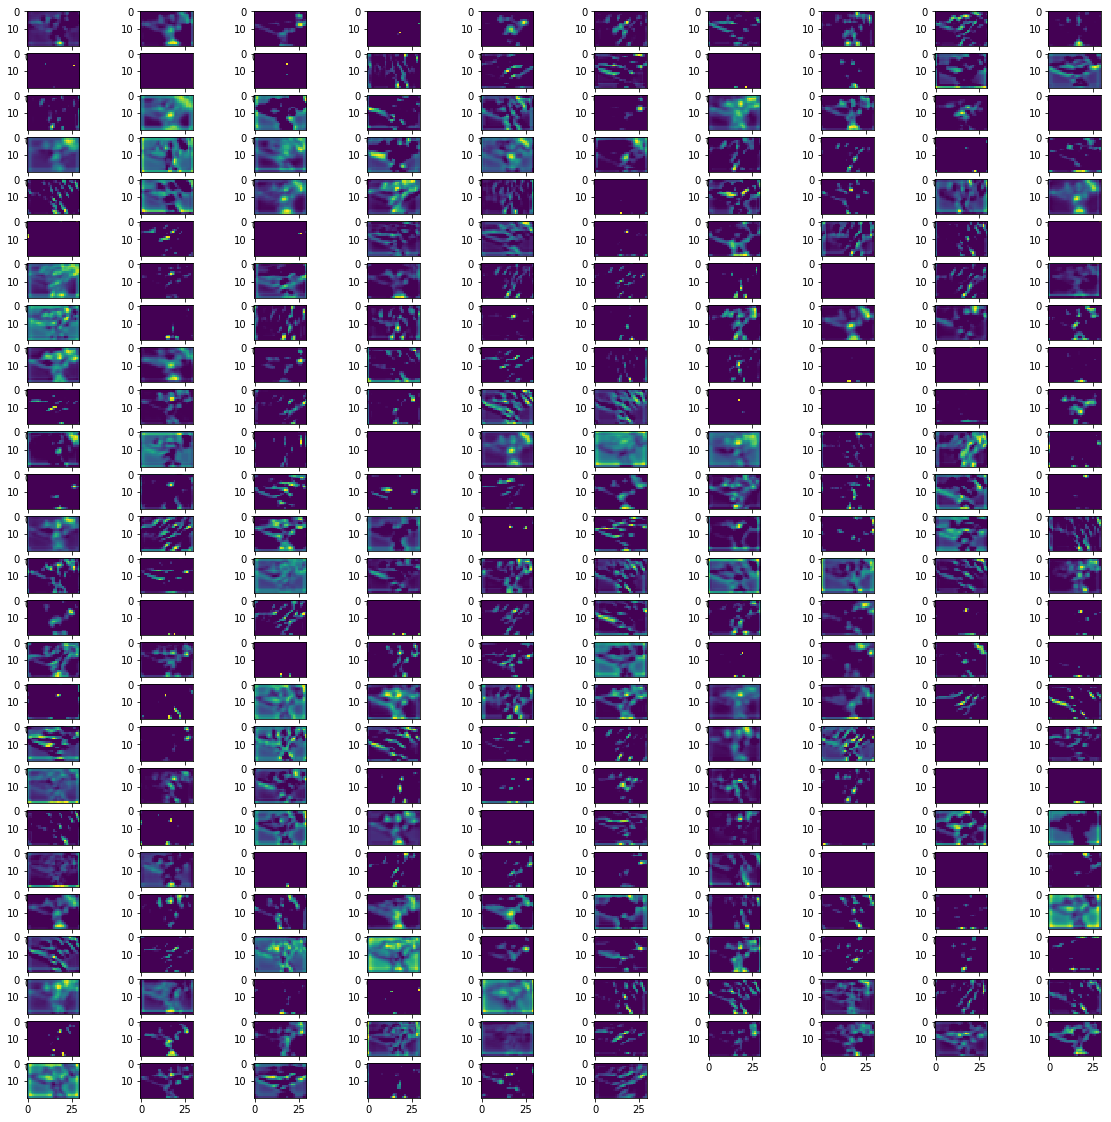

In [10]:
visualise_layer(10)

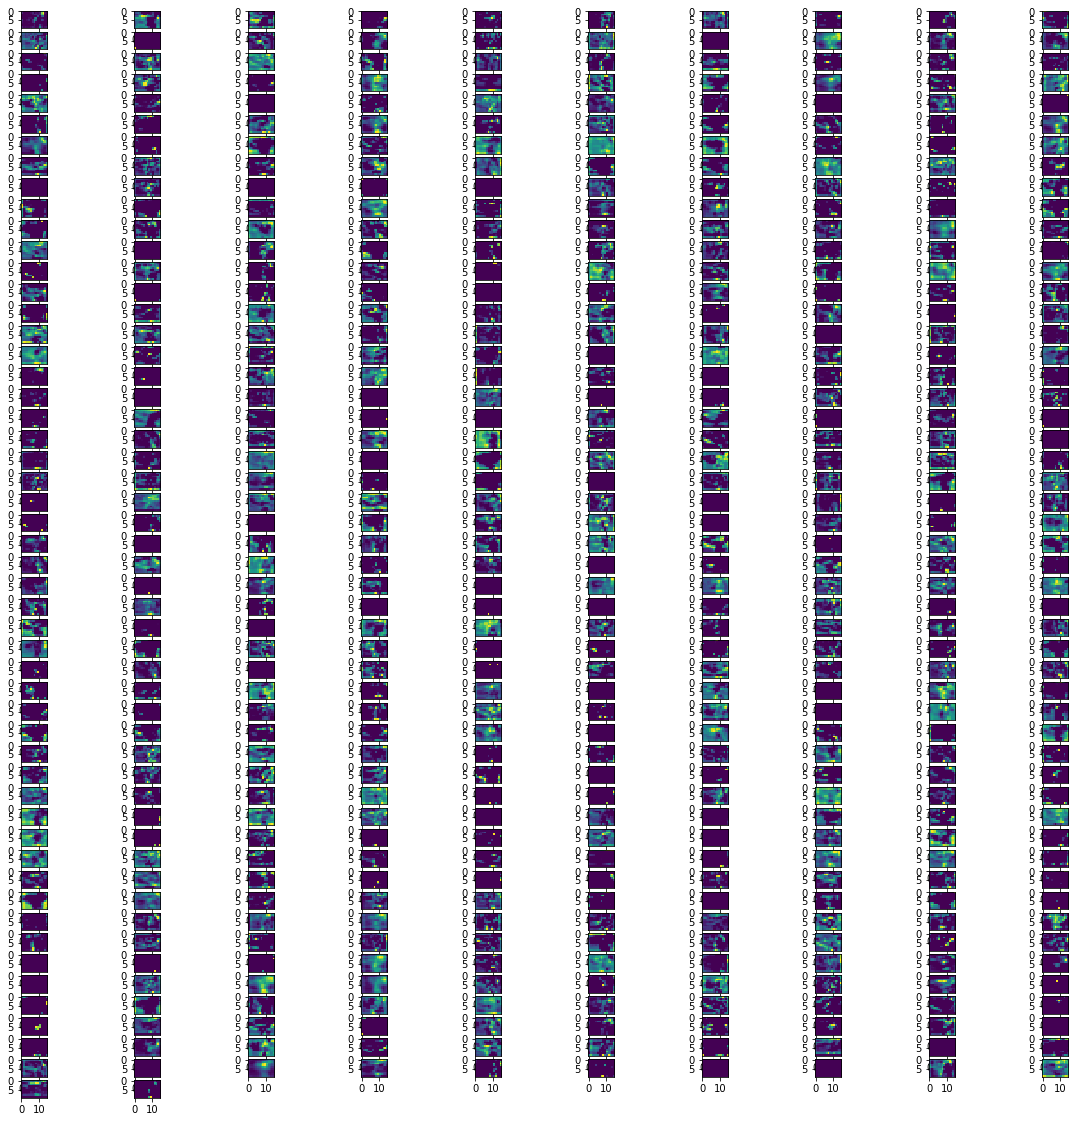

In [12]:
visualise_layer(12)